In [3]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [4]:
teams_df = pd.read_csv("Teams.csv")
playoffs_df = pd.read_csv("PlayoffTeams.csv")
salaries_df = pd.read_csv("Salaries.csv")
franchises_df = pd.read_csv("TeamsFranchises.csv")
teams_df.head()
teams_df.count

<bound method DataFrame.count of       yearID lgID teamID franchID divID  Rank    G  Ghome   W   L  ...     DP  \
0       1871  NaN    BS1      BNA   NaN     3   31    NaN  20  10  ...    NaN   
1       1871  NaN    CH1      CNA   NaN     2   28    NaN  19   9  ...    NaN   
2       1871  NaN    CL1      CFC   NaN     8   29    NaN  10  19  ...    NaN   
3       1871  NaN    FW1      KEK   NaN     7   19    NaN   7  12  ...    NaN   
4       1871  NaN    NY2      NNA   NaN     5   33    NaN  16  17  ...    NaN   
...      ...  ...    ...      ...   ...   ...  ...    ...  ..  ..  ...    ...   
2800    2015   NL    LAN      LAD     W     1  162   81.0  92  70  ...  133.0   
2801    2015   NL    SFN      SFG     W     2  162   81.0  84  78  ...  145.0   
2802    2015   NL    ARI      ARI     W     3  162   81.0  79  83  ...  146.0   
2803    2015   NL    SDN      SDP     W     4  162   81.0  74  88  ...  138.0   
2804    2015   NL    COL      COL     W     5  162   81.0  68  94  ...  171.

In [5]:
# clean up Teams dataframes to chosen years (2005-2015)

teams_df = teams_df.loc[teams_df['yearID'] > 2004]
teams_df.count
playoffs_df = playoffs_df.loc[playoffs_df['yearID'] > 2004]
playoffs_df.count

<bound method DataFrame.count of      yearID  round teamIDwinner lgIDwinner teamIDloser lgIDloser  wins  \
222    2005   ALCS          CHA         AL         LAA        AL     4   
223    2005  ALDS1          CHA         AL         BOS        AL     3   
224    2005  ALDS2          LAA         AL         NYA        AL     3   
225    2005   NLCS          HOU         NL         SLN        NL     4   
226    2005  NLDS1          SLN         NL         SDN        NL     3   
..      ...    ...          ...        ...         ...       ...   ...   
302    2015   NLWC          CHN         NL         PIT        NL     1   
303    2015   NLCS          NYN         NL         CHN        NL     4   
304    2015  NLDS1          CHN         NL         SLN        NL     3   
305    2015  NLDS2          NYN         NL         LAN        NL     3   
306    2015     WS          KCA         AL         NYN        NL     4   

     losses  ties  
222       1     0  
223       0     0  
224       2     0 

In [6]:
# plot_df = cleaned_df[['Drug Regimen', 'Mouse ID']].drop_duplicates().groupby('Drug Regimen').count()

winners_df = playoffs_df[['teamIDwinner']].drop_duplicates()
winners_df.head()
winners_df.count()
#losers_df
losers_df = playoffs_df[['teamIDloser']].drop_duplicates()
losers_df.head()
losers_df.count()

print(winners_df)
print(losers_df)

    teamIDwinner
222          CHA
224          LAA
225          HOU
226          SLN
229          DET
231          OAK
233          NYN
236          BOS
238          CLE
239          COL
240          ARI
243          TBA
246          PHI
247          LAN
250          NYA
257          TEX
260          SFN
269          MIL
271          BAL
284          PIT
289          KCA
301          TOR
302          CHN
    teamIDloser
222         LAA
223         BOS
224         NYA
225         SLN
226         SDN
227         ATL
228         HOU
229         OAK
231         MIN
232         NYN
233         LAN
235         DET
236         CLE
239         ARI
240         CHN
241         PHI
242         COL
245         CHA
248         MIL
249         TBA
261         CIN
263         TEX
273         BAL
277         WAS
286         PIT
297         KCA
299         TOR


In [7]:
playoffs_cs_df = playoffs_df.loc[playoffs_df['round'].isin(['NLCS','ALCS'])]


playoffs_cs_df.head()


,yearID,round,teamIDwinner,lgIDwinner,teamIDloser,lgIDloser,wins,losses,ties
222,2005,ALCS,CHA,AL,LAA,AL,4,1,0
225,2005,NLCS,HOU,NL,SLN,NL,4,2,0
229,2006,ALCS,DET,AL,OAK,AL,4,0,0
232,2006,NLCS,SLN,NL,NYN,NL,4,3,0
236,2007,ALCS,BOS,AL,CLE,AL,4,3,0


In [8]:
#amount of times teams made it conference championship series
winner=playoffs_cs_df['teamIDwinner'].value_counts()
print(winner)
loser=playoffs_cs_df['teamIDloser'].value_counts()
type(loser)
data= {"winner":winner,"loser":loser}
playoffs_record= pd.DataFrame(data)

playoffs1_record=playoffs_record.fillna(0)
playoffs1_record

SFN    3
SLN    3
BOS    2
TEX    2
DET    2
KCA    2
PHI    2
NYA    1
NYN    1
HOU    1
TBA    1
COL    1
CHA    1
Name: teamIDwinner, dtype: int64


,winner,loser
ARI,0.0,1.0
BAL,0.0,1.0
BOS,2.0,1.0
CHA,1.0,0.0
CHN,0.0,1.0
CLE,0.0,1.0
COL,1.0,0.0
DET,2.0,2.0
HOU,1.0,0.0
KCA,2.0,0.0


In [11]:
#total amount of appearences to champions series

total_appear=winner.add(loser,fill_value=0)

total_appear.head(15)

ARI    1.0
BAL    1.0
BOS    3.0
CHA    1.0
CHN    1.0
CLE    1.0
COL    1.0
DET    4.0
HOU    1.0
KCA    2.0
LAA    2.0
LAN    3.0
MIL    1.0
NYA    3.0
NYN    2.0
dtype: float64

In [52]:
# Labels for the sections of our pie chart
al_labels = ["BOS","DET","KCA", "LAA", "TEX","NYA"]

# The values of each section of the pie chart
al_sizes = [3,4,3,2,2,3]

# The colors of each section of the pie chart
al_colors = ["blue", "orange", "lightcoral", "red","green","yellow"]

# Tells matplotlib to seperate the "Humans" section from the others
al_explode = (0, 0.1, 0, 0,0,0)

([<matplotlib.patches.Wedge at 0x1e45fceaeb8>,
 [Text(-0.20837777631857382, -1.1817693101178954, 'SLN'),
  Text(1.0832885432166985, -0.19101291091296255, 'SFN'),
  Text(0.707066278611626, 0.8426489646645907, 'PHI'),
  Text(-0.19101313348403376, 1.0832885039714077, 'NYN'),
  Text(-0.9526280242657644, 0.5499998612577156, 'LAN'),
  Text(-1.08328849726493, -0.19101317151832783, 'COL')],
 [Text(-0.12155370285250139, -0.6893654309021057, '33.3%'),
  Text(0.590884659936381, -0.10418886049797955, '16.7%'),
  Text(0.38567251560634136, 0.4596267079988676, '16.7%'),
  Text(-0.10418898190038203, 0.5908846385298587, '11.1%'),
  Text(-0.5196152859631442, 0.29999992432239025, '16.7%'),
  Text(-0.5908846348717799, -0.10418900264636062, '5.6%')])

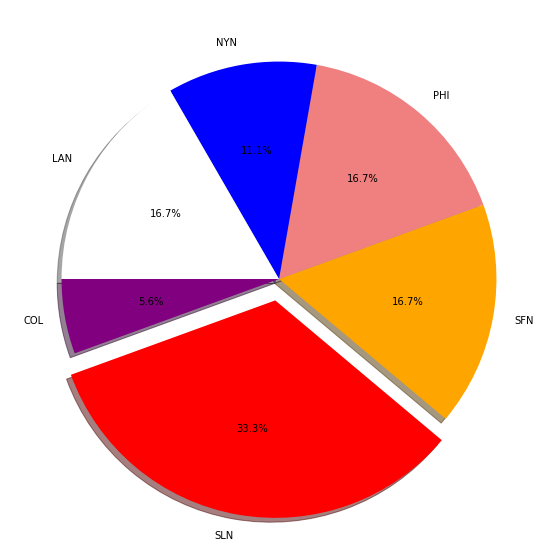

In [58]:
#ALCS appearences
plt.figure(figsize=(10, 10))
plt.pie(sizes, explode= explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)


In [49]:
# Labels for the sections of our pie chart
NL_labels = ["SLN","SFN","PHI", "NYN", "LAN","COL"]

# The values of each section of the pie chart
NL_sizes = [6,3,3,2,3,1]

# The colors of each section of the pie chart
NL_colors = ["red", "orange", "lightcoral", "blue","white","purple"]

# Tells matplotlib to seperate the "Humans" section from the others
NL_explode = (0.1,0, 0, 0,0,0)







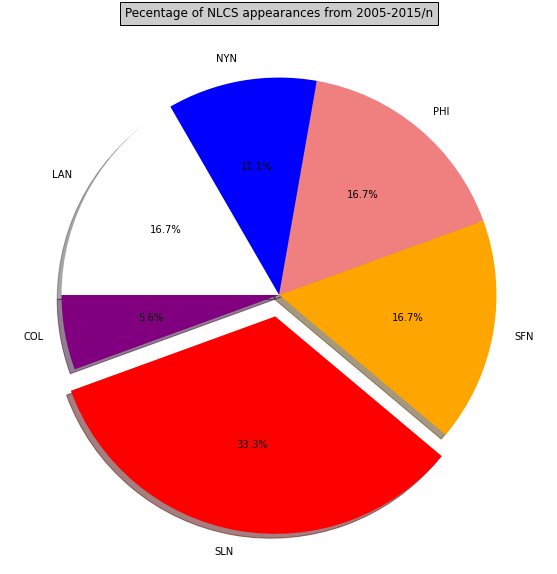

In [63]:
#NLCS appearences

plt.figure(figsize=(10, 10))
plt.pie(NL_sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)
plt.title("Pecentage of NLCS appearances from 2005-2015", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [27]:
#formula for payroll broken up by year
#salaries_df = salaries_df.groupby(['
#salaries_df.head()

In [61]:
#team AVverage payroll per yr 
tmsalaries_df = salaries_df.groupby('teamID', as_index=False).sum()

tmsalaries_df.head(22)

,teamID,yearID,salary
0,ANA,494074,468091973
1,ARI,1029194,1271809228
2,ATL,1771742,1954728034
3,BAL,1821757,1745244871
4,BOS,1830249,2613804335
5,CAL,732603,271978930
6,CHA,1725832,1812238843
7,CHN,1751892,1975712625
8,CIN,1801854,1547847634
9,CLE,1843847,1492679894
